# Portfolio Part 3 - Analysis of Mobile Price Data (2024 S1)

In this Portfolio task, you will work on a new dataset named 'Mobile Price Data', it contains numerous details about mobile phone hardware, specifications, and prices. Your main task is to train classification models to predict **mobile phone prices** ('price range' in the dataset)and evaluate the strengths and weaknesses of these models.

Here's the explanation of each column:

|Column|Meaning|
|:-----:|:-----:|
|battery power|Total energy a battery can store in one time measured in mAh|
|blue|Has bluetooth or not|
|clock speed|speed at which microprocessor executes instructions|
|dual sim|Has dual sim support or not|
|fc|Front Camera mega pixels|
|four g|Has 4G or not|
|int memory|Internal Memory in Gigabytes|
|m dep|Mobile Depth in cm|
|mobile wt|Weight of mobile phone|
|n cores|Number of cores of processor|
|pc|Primary Camera mega pixels|
|px height|Pixel Resolution Height|
|px width|Pixel Resolution Width|
|ram|Random Access Memory in Mega Bytes|
|sc h|Screen Height of mobile in cm|
|sc w|Screen Width of mobile in cm|
|talk time|longest time that a single battery charge will last when you are|
|three g|Has 3G or not|
|touch screen|Has touch screen or not|
|wifi|Has wifi or not|
|price range|This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)|

Blue, dual sim, four g, three g, touch screen, and wifi are all binary attributes, 0 for not and 1 for yes.

Your high level goal in this notebook is to build and evaluate predictive models for 'price range' from other available features. More specifically, you need to **complete the following major steps**:

1. ***Explore the data*** and ***clean the data if necessary***. For example, remove abnormal instanaces and replace missing values.

2. ***Study the correlation*** between 'price range' with other features. And ***select the variables*** that you think are helpful for predicting the price range. We do not limit the number of variables.

3. ***Split the dataset*** (Trainging set : Test set = 8 : 2)

4. ***Train a logistic regression model*** to predict 'price range' based on the selected features (from the second step). ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.) ***Explain your model and evaluate its performance*** (Is the model performing well? If yes, what factors might be contributing to the good performance of your model? If not, how can improvements be made?).

5. ***Train a KNN model*** to predict 'price range' based on the selected features (you can use the features selected from the second step and set K with an ad-hoc manner in this step. ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.)

6. ***Tune the hyper-parameter K*** in KNN (Hints: GridsearchCV), ***visualize the results***, and ***explain*** how K influences the prediction performance.

  Hints for visualization: You can use line chart to visualize K and mean accuracy scores on test set.

Note 1: In this assignment, we no longer provide specific guidance and templates for each sub task. You should learn how to properly comment your notebook by yourself to make your notebook file readable.

Note 2: You will not being evaluated on the accuracy of the model but on the process that you use to generate it and your explanation.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# assigning the dataset into a variable 
ds = 'Mobile_Price_Data.csv'

# Reading csv files as dataframes using read_csv function 
data = pd.read_csv(ds)

In [2]:
# Displaying the dataframe 
print("DISPLAYING THE DATAFRAME:\n") 
display(data)

DISPLAYING THE DATAFRAME:



battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0         7.0   
1              1021     1          0.5         1   0       1        53.0   
2               563     1          0.5         1   2       1        41.0   
3               615     1          2.5         0   0       0        10.0   
4              1821     1          1.2         0  13       1        44.0   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1         2.0   
1996           1965     1          2.6         1   0       0        39.0   
1997           1911     0          0.9         1   1       1        36.0   
1998           1512     0          0.9         0   4       1        46.0   
1999            510     1          2.0         1   5       1        45.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0       0.6        188        2  ...         20     756.0  2549.0     9     7   
1       0.7        136        3  ...        905    1988.0  2631.0    17     3   
2       0.9        145        5  ...       1263    1716.0  2603.0    11     2   
3       0.8        131        6  ...       1216    1786.0  2769.0    16     8   
4       0.6        141        2  ...       1208    1212.0  1411.0     8     2   
...     ...        ...      ...  ...        ...       ...     ...   ...   ...   
1995    0.8        106        6  ...       1222    1890.0   668.0    13     4   
1996    0.2        187        4  ...        915    1965.0  2032.0    11    10   
1997    0.7        108        8  ...        868    1632.0  3057.0     9     1   
1998    0.1        145        5  ...        336     670.0   869.0    18    10   
1999    0.9        168        6  ...        483     754.0  3919.0    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19      0.0             0     1            1  
1             7      1.0             1     0            2  
2             9      1.0             1     0            2  
3            11      1.0             0     0            2  
4            15      1.0             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19      1.0             1     0            0  
1996         16      1.0             1     1            2  
1997          5      1.0             1     0            3  
1998         19      1.0             1     1            0  
1999          2      1.0             1     1            3  

[2000 rows x 21 columns]

In [3]:
# Printing the total length of the data
print("PRINTING THE LENGTH OF THE DATA:-")
print("The number of rows and coloumns in the data:- " + str(data.shape))

PRINTING THE LENGTH OF THE DATA:-
The number of rows and coloumns in the data:- (2000, 21)


In [4]:
# Diplaying the first few rows of the dataset using the .head() method 
print("Displaying the first few rows of the dataset:-\n" + str(data.head()))

# Displaying the information of the dataset 
print("Displaying the information of the dataset:- ")
data.info()

Displaying the first few rows of the dataset:-
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0         7.0    0.6   
1           1021     1          0.5         1   0       1        53.0    0.7   
2            563     1          0.5         1   2       1        41.0    0.9   
3            615     1          2.5         0   0       0        10.0    0.8   
4           1821     1          1.2         0  13       1        44.0    0.6   

   mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0        188        2  ...         20     756.0  2549.0     9     7   
1        136        3  ...        905    1988.0  2631.0    17     3   
2        145        5  ...       1263    1716.0  2603.0    11     2   
3        131        6  ...       1216    1786.0  2769.0    16     8   
4        141        2  ...       1208    1212.0  1411.0     8     2   

   talk_time  three_g  touch_screen  wifi  pr

In [5]:
# Checking for missing values
print(data.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       1
m_dep            1
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         1
ram              1
sc_h             0
sc_w             0
talk_time        0
three_g          1
touch_screen     0
wifi             0
price_range      0
dtype: int64


By checking for the missing values we can understand we bear a few of them. Since, there are only a few missing values we can replace them with the mean value of their respective column.

In [6]:
# Replacing missing values
data.fillna(data.mean(), inplace=True) 

In [7]:
# Checking for missing values after replacing them with mean values 
print(data.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


After we are done dealing with the missing values we can proceed with further cleaning of the data. And we are going to do so by removing the outliers in the dataset. 

In [9]:
# Calculate the IQR for each numerical column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define threshold for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((data < lower_bound) | (data > upper_bound)).any(axis=1)

# Remove outliers from the dataset
cleaned_data = data[~outliers]

# Print the number of removed outliers
print("Number of removed outliers:", outliers.sum())


Number of removed outliers: 495


Outliers are extreme values that differ from most other data points in a dataset. Removing outliers can help improve the quality of the data for analysis by reducing the influence of extreme values. And it can be observed from the above code that 495 outliers were removed basing on the defined thresholds using the Interquartile Range (IQR) method. 

For Further cleaning, we are going to convert binary attributes to numeric format. The reasons for which are :- 
1. Compatability with Machine Learning Algorithms: Many machine learning algorithms expect numeric input. While some algorithms can handle categorical variables directly, others require numerical input. By converting binary attributes to numeric format (0s and 1s), we can ensure compatibility with a broader range of algorithms.
2. Simplifies Data Handling: Working with numeric data is generally more convenient than dealing with categorical variables, especially when performing calculations or transformations. Numeric representations simplify data manipulation tasks and can streamline the preprocessing pipeline.
3. Enhanced Interpretability: Some machine learning algorithms, such as linear models, interpret numeric data more naturally. Converting binary attributes to numeric format can enhance the interpretability of the model's results, making it easier to understand the impact of each feature on the prediction.
4. Avoids One-Hot Encoding Overhead: While binary attributes could be represented using one-hot encoding (creating separate binary columns for each category), converting them to a single numeric column saves memory and computational resources, especially when dealing with large datasets.
5. Consistency in Data Representation: Converting binary attributes to numeric format ensures consistency in data representation across different parts of your analysis or modeling pipeline. It reduces the risk of errors or inconsistencies that could arise from using different representations for the same attribute.

In [10]:
# Printing out column names 
print(data.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [11]:
# Converting binary attributes to numeric format
binary_cols = ['blue', 'dual sim', 'four g', 'three g', 'touch screen', 'wifi']

In [12]:
# Checking for leading or trailing whitespaces and remove them if present
binary_cols = [col.strip() for col in binary_cols]

In [13]:
# Ensuring the column names exist in the DataFrame before conversion
existing_cols = [col for col in binary_cols if col in data.columns]
data[existing_cols] = data[existing_cols].astype(int)

In [14]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1505 entries, 1 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1505 non-null   int64  
 1   blue           1505 non-null   int64  
 2   clock_speed    1505 non-null   float64
 3   dual_sim       1505 non-null   int64  
 4   fc             1505 non-null   int64  
 5   four_g         1505 non-null   int64  
 6   int_memory     1505 non-null   float64
 7   m_dep          1505 non-null   float64
 8   mobile_wt      1505 non-null   int64  
 9   n_cores        1505 non-null   int64  
 10  pc             1505 non-null   int64  
 11  px_height      1505 non-null   int64  
 12  px_width       1505 non-null   float64
 13  ram            1505 non-null   float64
 14  sc_h           1505 non-null   int64  
 15  sc_w           1505 non-null   int64  
 16  talk_time      1505 non-null   int64  
 17  three_g        1505 non-null   float64
 18  touch_screen 

In [74]:
cleaned_data.describe()

battery_power         blue  clock_speed     dual_sim           fc  \
count    1505.000000  1505.000000  1505.000000  1505.000000  1505.000000   
mean     1238.887708     0.486379     1.500532     0.504983     4.184718   
std       439.262653     0.499981     0.814055     0.500141     4.216439   
min       501.000000     0.000000     0.500000     0.000000     0.000000   
25%       852.000000     0.000000     0.700000     0.000000     1.000000   
50%      1224.000000     0.000000     1.500000     1.000000     3.000000   
75%      1619.000000     1.000000     2.200000     1.000000     7.000000   
max      1998.000000     1.000000     3.000000     1.000000    16.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  1505.000000  1505.000000  1505.000000  1505.000000  1505.000000  ...   
mean      0.684385    31.952183     0.499935   140.227907     4.508970  ...   
std       0.464915    18.210109     0.287795    35.141458     2.277043  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    31.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  1505.000000  1505.000000  1505.000000  1505.000000  1505.000000   
mean    632.438538  1249.356523  2136.475893    12.341528     5.847176   
std     435.314255   429.106922  1084.766663     4.213269     4.418955   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     275.000000   877.000000  1223.000000     9.000000     2.000000   
50%     557.000000  1247.000000  2166.000000    12.000000     5.000000   
75%     931.000000  1623.000000  3083.000000    16.000000     9.000000   
max    1920.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time  three_g  touch_screen         wifi  price_range  
count  1505.000000   1505.0   1505.000000  1505.000000  1505.000000  
mean     10.867110      1.0      0.506312     0.504983     1.514286  
std       5.435638      0.0      0.500126     0.500141     1.116231  
min       2.000000      1.0      0.000000     0.000000     0.000000  
25%       6.000000      1.0      0.000000     0.000000     1.000000  
50%      11.000000      1.0      1.000000     1.000000     2.000000  
75%      15.000000      1.0      1.000000     1.000000     3.000000  
max      20.000000      1.0      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [15]:
cleaned_data

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1              1021     1          0.5         1   0       1        53.0   
2               563     1          0.5         1   2       1        41.0   
3               615     1          2.5         0   0       0        10.0   
4              1821     1          1.2         0  13       1        44.0   
5              1859     0          0.5         1   3       0        22.0   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1         2.0   
1996           1965     1          2.6         1   0       0        39.0   
1997           1911     0          0.9         1   1       1        36.0   
1998           1512     0          0.9         0   4       1        46.0   
1999            510     1          2.0         1   5       1        45.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
1       0.7        136        3  ...        905    1988.0  2631.0    17     3   
2       0.9        145        5  ...       1263    1716.0  2603.0    11     2   
3       0.8        131        6  ...       1216    1786.0  2769.0    16     8   
4       0.6        141        2  ...       1208    1212.0  1411.0     8     2   
5       0.7        164        1  ...       1004    1654.0  1067.0    17     1   
...     ...        ...      ...  ...        ...       ...     ...   ...   ...   
1995    0.8        106        6  ...       1222    1890.0   668.0    13     4   
1996    0.2        187        4  ...        915    1965.0  2032.0    11    10   
1997    0.7        108        8  ...        868    1632.0  3057.0     9     1   
1998    0.1        145        5  ...        336     670.0   869.0    18    10   
1999    0.9        168        6  ...        483     754.0  3919.0    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1             7      1.0             1     0            2  
2             9      1.0             1     0            2  
3            11      1.0             0     0            2  
4            15      1.0             1     0            1  
5            10      1.0             0     0            1  
...         ...      ...           ...   ...          ...  
1995         19      1.0             1     0            0  
1996         16      1.0             1     1            2  
1997          5      1.0             1     0            3  
1998         19      1.0             1     1            0  
1999          2      1.0             1     1            3  

[1505 rows x 21 columns]

In [16]:
data

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0         7.0   
1              1021     1          0.5         1   0       1        53.0   
2               563     1          0.5         1   2       1        41.0   
3               615     1          2.5         0   0       0        10.0   
4              1821     1          1.2         0  13       1        44.0   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1         2.0   
1996           1965     1          2.6         1   0       0        39.0   
1997           1911     0          0.9         1   1       1        36.0   
1998           1512     0          0.9         0   4       1        46.0   
1999            510     1          2.0         1   5       1        45.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0       0.6        188        2  ...         20     756.0  2549.0     9     7   
1       0.7        136        3  ...        905    1988.0  2631.0    17     3   
2       0.9        145        5  ...       1263    1716.0  2603.0    11     2   
3       0.8        131        6  ...       1216    1786.0  2769.0    16     8   
4       0.6        141        2  ...       1208    1212.0  1411.0     8     2   
...     ...        ...      ...  ...        ...       ...     ...   ...   ...   
1995    0.8        106        6  ...       1222    1890.0   668.0    13     4   
1996    0.2        187        4  ...        915    1965.0  2032.0    11    10   
1997    0.7        108        8  ...        868    1632.0  3057.0     9     1   
1998    0.1        145        5  ...        336     670.0   869.0    18    10   
1999    0.9        168        6  ...        483     754.0  3919.0    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19      0.0             0     1            1  
1             7      1.0             1     0            2  
2             9      1.0             1     0            2  
3            11      1.0             0     0            2  
4            15      1.0             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19      1.0             1     0            0  
1996         16      1.0             1     1            2  
1997          5      1.0             1     0            3  
1998         19      1.0             1     1            0  
1999          2      1.0             1     1            3  

[2000 rows x 21 columns]

We will try to understand the relationship between different variables in the dataset by genrating a heatmap of the correlation matrix 

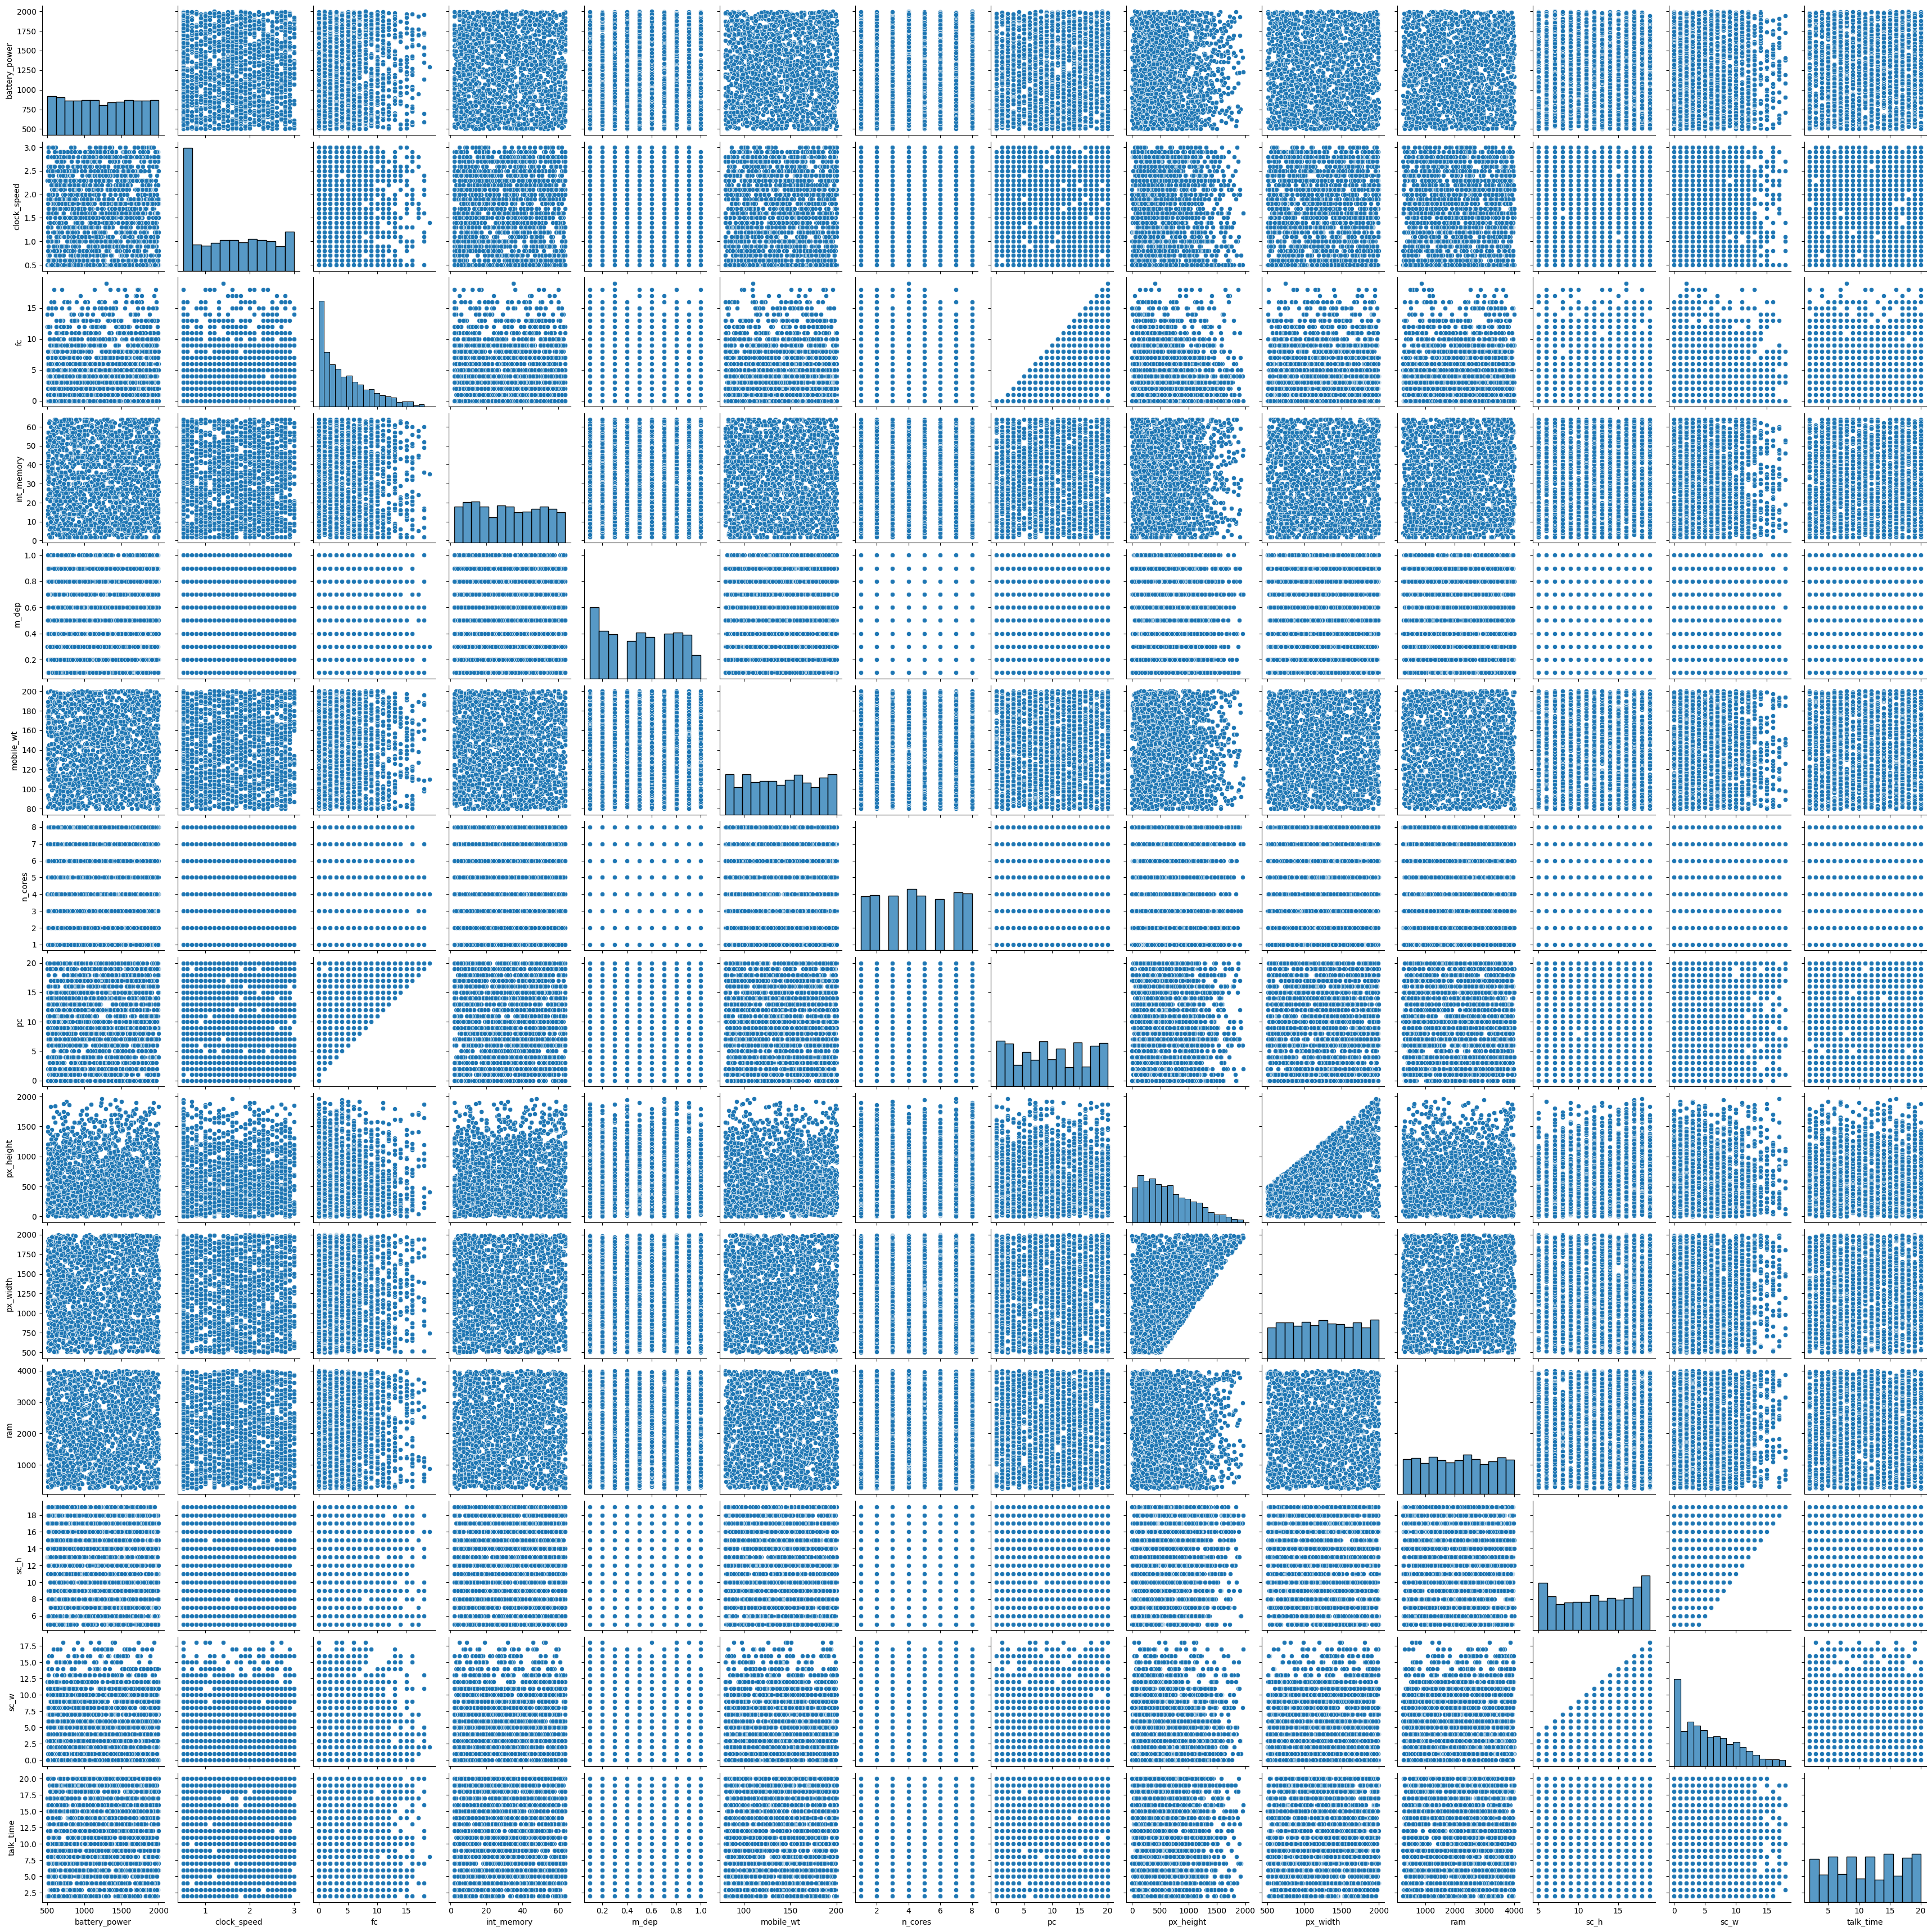

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# EDA: Explore distributions of numerical features
numerical_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
sns.pairplot(data[numerical_features])
plt.show()


Now we are going to generate a heatmap to understand the correlation of the variables in correspondence to the target variable that is 'price_range'.
It is a square matrix where each cell represents the correlation coefficient between two features. Positive values indicate a positive correlation
(a linear relationsip) , while negative values denotes a negative correlation (inversly proportional relationship). A coefficient close to 1
to -1 indicates a strong correlation while a value close to 0 indicates weak or no correlation. 

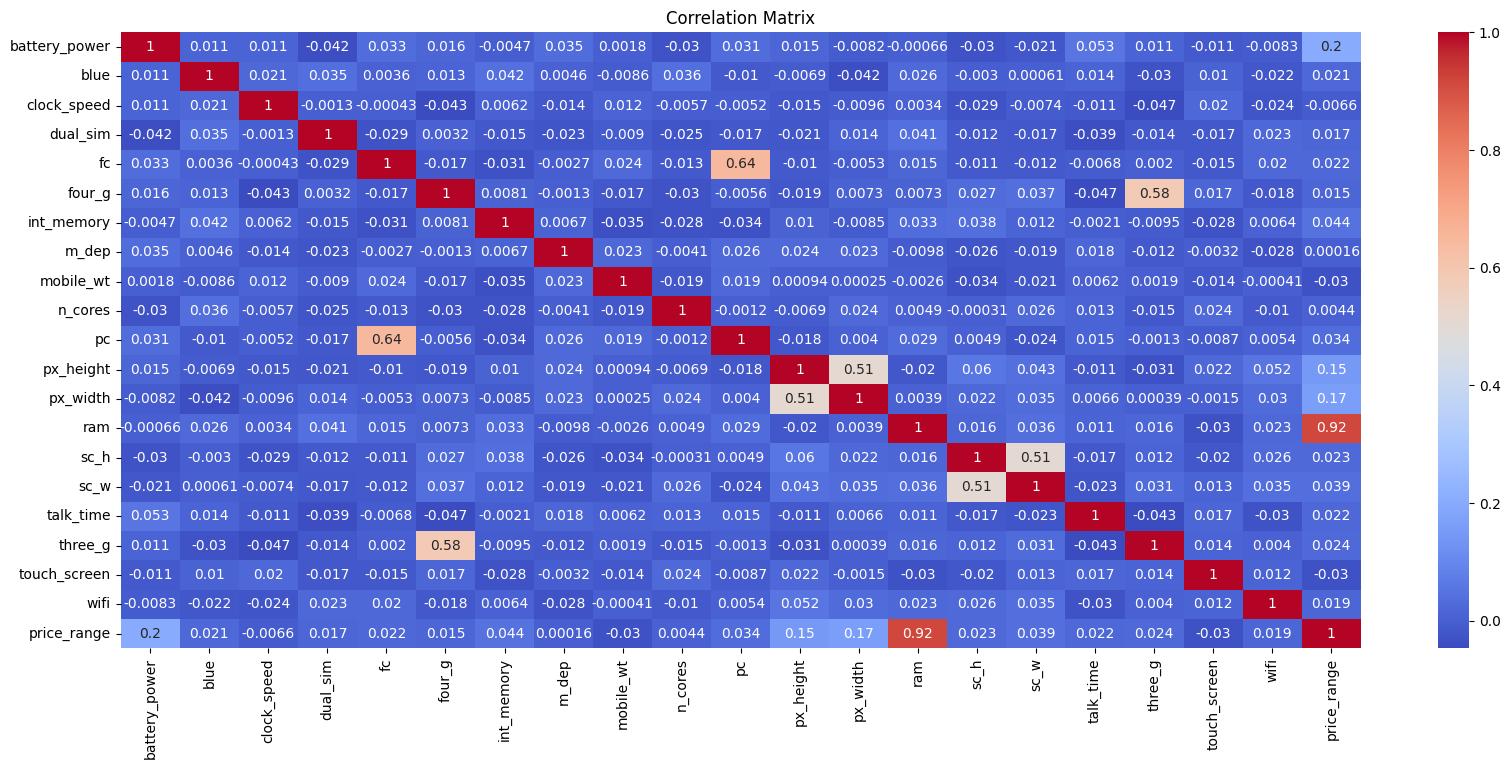

In [19]:
# Setting the figure size
plt.figure(figsize=(20, 8))  # Adjusting width and height as needed

# Examining correlation between features and target variable
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Understanding the correlation between features is important for feature selection, identifying multicollinearity, and understanding the relationships between variables in your dataset. 
It helps in making informed decisions during the modeling process and can improve the performance of your machine learning models.
As For example: The correlation coefficient between battery_power and ram is approximately -0.000661, indicating a very weak negative correlation which is not so vital in this case. 

In [29]:
# Get correlations between features
correlation_matrix = data[numerical_features].corr()

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get correlations between features
correlation_matrix = data[numerical_features].corr()



By adding the target variable to the correlation matrix, we'll be able to see how each numerical feature correlates with the target variable "price_range.

In [31]:
# Adding the target variable "price_range" to the numerical features list
numerical_features_with_target = numerical_features + ['price_range']

# Getting correlations including the target variable
correlation_matrix_with_target = data[numerical_features_with_target].corr()

# Printing correlation matrix including the target variable
print(correlation_matrix_with_target)


               battery_power  clock_speed        fc  int_memory     m_dep  \
battery_power       1.000000     0.011482  0.033334   -0.004699  0.034643   
clock_speed         0.011482     1.000000 -0.000434    0.006177 -0.014100   
fc                  0.033334    -0.000434  1.000000   -0.030704 -0.002709   
int_memory         -0.004699     0.006177 -0.030704    1.000000  0.006695   
m_dep               0.034643    -0.014100 -0.002709    0.006695  1.000000   
mobile_wt           0.001844     0.012350  0.023618   -0.034724  0.022628   
n_cores            -0.029727    -0.005724 -0.013356   -0.027624 -0.004066   
pc                  0.031441    -0.005245  0.644595   -0.034131  0.025941   
px_height           0.014901    -0.014523 -0.009990    0.010291  0.024489   
px_width           -0.008209    -0.009625 -0.005294   -0.008540  0.022974   
ram                -0.000661     0.003448  0.015095    0.032821 -0.009766   
sc_h               -0.029959    -0.029078 -0.011014    0.037532 -0.025931   

We will try to pick the top 5 features that bear positive correlations with the target variable as it bears much more significance in the predictions results. 

In [32]:
# Inorder to get the top 5 features bearing positive correlation with the target variable 'prive_range'
# Getting correlation coefficients between 'price_range' and other features
price_range_correlation = correlation_matrix_with_target['price_range']

# Sorting the correlation coefficients in descending order
sorted_correlation = price_range_correlation.sort_values(ascending=False)

# Extracting the top 5 features with positive correlation
top_5_positive_correlation = sorted_correlation[1:6]  # Excluding 'price_range' itself

print("Top 5 features with positive correlation with 'price_range':")
print(top_5_positive_correlation)


Top 5 features with positive correlation with 'price_range':
ram              0.917043
battery_power    0.200723
px_width         0.165661
px_height        0.148858
int_memory       0.044170
Name: price_range, dtype: float64


Hence, the top 5 features which bear positive correlation with the target variable are 'price_range' are 'ram', 'battery_power', 'px_width', 'px_height', and 'int_memory'. 
Each feature represents - 
1. ram: This feature has the highest positive correlation coefficient of approximately 0.917. 
It suggests that as the RAM (Random Access Memory) of a mobile phone increases, the price range tends to increase as well. 
This means that higher RAM is associated with higher-priced mobile phones.
2. battery_power: This feature has the second-highest positive correlation coefficient of approximately 0.201. 
It indicates that there is a moderate positive correlation between battery power and price range. 
Higher battery power is associated with higher-priced mobile phones.
3. px_width: This feature has the third-highest positive correlation coefficient of approximately 0.166. 
It suggests that as the pixel resolution width of a mobile phone increases, the price range tends to increase as well. 
This means that higher pixel resolution width is associated with higher-priced mobile phones.
4. px_height: This feature has the fourth-highest positive correlation coefficient of approximately 0.149. 
Similar to 'px_width', it indicates that as the pixel resolution height of a mobile phone increases, the price range tends to increase.
Higher pixel resolution height is associated with higher-priced mobile phones.
5. int_memory: his feature has the fifth-highest positive correlation coefficient of approximately 0.044. It suggests that there is a relatively weaker positive correlation between internal memory (int_memory) and price range. 
Higher internal memory is associated with higher-priced mobile phones, but the correlation is not as strong as the other features in the top 5.

We are taking the top 5 features into account and splitting the dataset accordingly

In [34]:
from sklearn.model_selection import train_test_split

# Selecting the top 5 features with positive correlation
top_5_features = ['ram', 'battery_power', 'px_width', 'px_height', 'int_memory']

# Creating a new DataFrame with selected features and target variable
selected_data = data[top_5_features + ['price_range']]

# Splitting the dataset into features (X) and target variable (y)
X = selected_data[top_5_features]
y = selected_data['price_range']

# Splitting the dataset into training set and test set (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the training set and test set
print("Training set shape (features):", X_train.shape)
print("Training set shape (target):", y_train.shape)
print("Test set shape (features):", X_test.shape)
print("Test set shape (target):", y_test.shape)


Training set shape (features): (1600, 5)
Training set shape (target): (1600,)
Test set shape (features): (400, 5)
Test set shape (target): (400,)


Training a Logistic Regression Model 

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initializing logistic regression model
logistic_reg = LogisticRegression(max_iter=1000)

# Training the model on the training data
logistic_reg.fit(X_train, y_train)

# Predictions on training set
train_predictions = logistic_reg.predict(X_train)

# Predictions on test set
test_predictions = logistic_reg.predict(X_test)

# Calculating accuracy on training set
train_accuracy = accuracy_score(y_train, train_predictions)

# Calculating accuracy on test set
test_accuracy = accuracy_score(y_test, test_predictions)

# Printing the accuracies
print("Accuracy on training set:", train_accuracy)
print("Accuracy on test set:", test_accuracy)


Accuracy on training set: 0.9625
Accuracy on test set: 0.9725


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The output you indicates the accuracy of the logistic regression model on both the training set and the test set:
1. Accuracy on the training set: 0.9625 (or 96.25%).
This means that the model correctly predicted the price range of 96.25% of the mobile phones in the training set.
2. Accuracy on the test set: 0.9725 (or 97.25%).
This means that the model correctly predicted the price range of 97.25% of the mobile phones in the test set.
In summary, the logistic regression model performed well on both the training and test sets, with high accuracy,
indicating that it's a good model for predicting the price range of mobile phones based on the selected features.

To explain and evaluate the logistic regression model's performance, we consider several factors- 
1. Overall Performance: The model achieved high accuracy on both the training and test sets, 
indicating that it generally performs well in predicting the price range of mobile phones.
2. Interpretability:  Logistic regression is a simple and interpretable model, which makes it easy to understand how each feature contributes to the prediction. 
In this case, the top five features with positive correlation ('ram', 'battery_power', 'px_width', 'px_height', and 'int_memory') 
were selected, and the model could effectively use these features to make accurate predictions.
3. Model Complexity: Logistic regression is a linear model, which means it assumes a linear relationship between the features 
and the target variable. Despite this simplicity, the model performed well, suggesting that the relationship between the selected features 
and the price range may indeed be approximately linear.
4. Potential Improvements: While the model's performance is satisfactory, there are several ways to potentially improve it:
    Feature Engineering: Exploring additional features or transformations of existing features that may better capture the underlying patterns in the data.
    Model Selection: Experimenting with other machine learning algorithms or more complex models to see if they can further improve predictive performance.
    Hyperparameter Tuning: Fine-tuning the hyperparameters of the logistic regression model or other algorithms to optimize performance.
    Handling Imbalanced Classes:  If there is significant class imbalance in the target variable, techniques such as oversampling, undersampling, 
    or using class weights can help improve model performance.
    Model Evaluation Metrics:  While accuracy is a commonly used metric, it may not provide a complete picture of model performance, especially in the presence of class imbalance or misclassification costs. Evaluating additional metrics such as precision, recall, F1-score, or ROC-AUC could provide more insights into the model's performance.
    Cross Validation: Repeated cross-validation or other resampling techniques can provide more robust estimates of model performance and help assess its generalization ability across different subsets of the data.

6. Generalization: While the model performed well on the test set, it's important to assess its performance on unseen data in real-world scenarios. 

Overall, the logistic regression model appears to be performing well, 
but continuous monitoring and potential refinements are necessary to ensure its effectiveness in real-world applications.




Training a KNN Model

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initializing KNN model with an ad-hoc value of K
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the value of K as needed

# Training the model on the training data
knn.fit(X_train, y_train)

# Predictions on training set
train_predictions_knn = knn.predict(X_train)

# Predictions on test set
test_predictions_knn = knn.predict(X_test)

# Calculating accuracy on training set
train_accuracy_knn = accuracy_score(y_train, train_predictions_knn)

# Calculating accuracy on test set
test_accuracy_knn = accuracy_score(y_test, test_predictions_knn)

# Print the accuracies
print("Accuracy of KNN on training set:", train_accuracy_knn)
print("Accuracy of KNN on test set:", test_accuracy_knn)


Accuracy of KNN on training set: 0.954375
Accuracy of KNN on test set: 0.945


The output indicates the accuracy of the K-Nearest Neighbors (KNN) model on both the training set and the test set.
This means that the KNN model achieved an accuracy of approximately 95.44% on the training set and approximately 94.50% on the test set.
Comparing this with the logistic regression model earlier:
Logistic Regression:
Accuracy on training set: 0.9625
Accuracy on test set: 0.9725

The logistic regression model achieved slightly higher accuracy on both the training and test sets compared to the KNN model. 
However, the difference in accuracy between the two models is not significant.

When comparing models, it's essential to consider not only accuracy but also other factors such as model interpretability, computational efficiency, and suitability for the specific problem at hand. 
In this case, both models perform relatively well, but logistic regression may be preferred if interpretability and computational efficiency are important. 
KNN, on the other hand, might be preferred if non-linearity and local structure in the data are crucial, and if computational resources permit its use.

Tuning the Hyper-parameter K in KNN

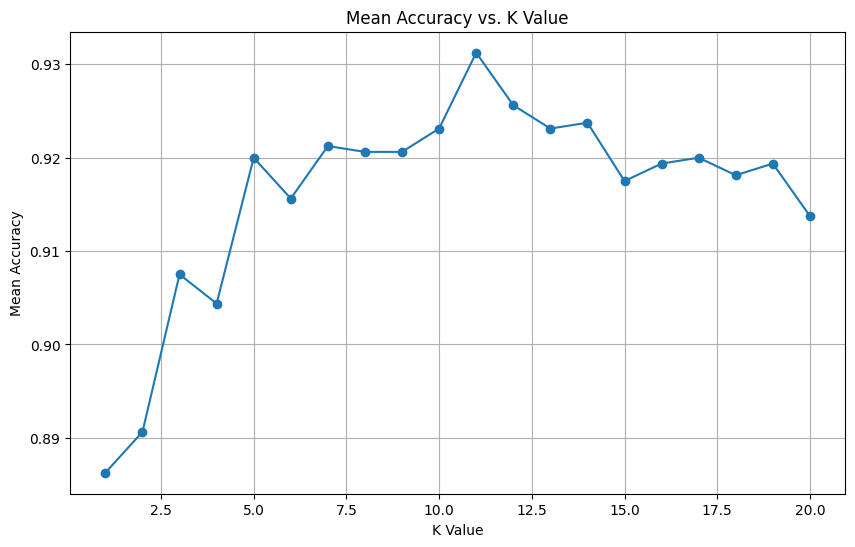

In [38]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Defining a range of K values to search
k_values = list(range(1, 21))

# Creating a parameter grid dictionary
param_grid = {'n_neighbors': k_values}

# Initializing KNN model
knn = KNeighborsClassifier()

# Initializing GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Getting the results of grid search
results = grid_search.cv_results_

# Extracting mean test scores and corresponding K values
mean_test_scores = results['mean_test_score']
k_values = results['param_n_neighbors']

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o', linestyle='-')
plt.title('Mean Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.show()




This resulting indicates a grid search over the range of K values specified, evaluate each value using cross-validation,
and then plot the mean accuracy scores against the K values. The best K value and its corresponding accuracy is printed.

The resulting plot shows how the choice of K influences the mean accuracy of the KNN model on the validation set. This visualization helps to understand the relationship between the hyper-parameter K 
and the prediction performance of the model.

In [91]:
# Getting the best K value and corresponding accuracy
best_k = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_

print("Best K value:", best_k)
print("Corresponding accuracy:", best_accuracy)

Best K value: 11
Corresponding accuracy: 0.93125


The best K value is 11 where from the graph we can see the corresponding accuracy is 93.12%. 

In [92]:
# Extracting mean test scores and corresponding K values
mean_test_scores = results['mean_test_score']
k_values = results['param_n_neighbors']

# Creating a dictionary to store K values and their corresponding mean test scores
k_scores = dict(zip(k_values, mean_test_scores))

# Sorting the dictionary by mean test scores in descending order
sorted_scores = sorted(k_scores.items(), key=lambda x: x[1], reverse=True)

# Getting the top five K values with positive influence
top_positive_k = sorted_scores[:5]

# Getting the top five K values with negative influence
top_negative_k = sorted_scores[-5:]

print("Top five K values with positive influence:")
for k, score in top_positive_k:
    print("K:", k, "Mean Test Score:", score)

print("\nTop five K values with negative influence:")
for k, score in top_negative_k:
    print("K:", k, "Mean Test Score:", score)


Top five K values with positive influence:
K: 11 Mean Test Score: 0.93125
K: 12 Mean Test Score: 0.9256250000000001
K: 14 Mean Test Score: 0.9237499999999998
K: 10 Mean Test Score: 0.923125
K: 13 Mean Test Score: 0.923125

Top five K values with negative influence:
K: 20 Mean Test Score: 0.91375
K: 3 Mean Test Score: 0.9075000000000001
K: 4 Mean Test Score: 0.9043749999999999
K: 2 Mean Test Score: 0.890625
K: 1 Mean Test Score: 0.8862500000000001


The output shows the top five K values that positively influence the prediction performance 
and the top five K values that negatively influence the prediction performance, 
based on their mean test scores obtained from grid search cross-validation.
For the top five K values with positive influence:
K values: 11, 12, 14, 10, 13
Mean Test Scores: These represent the mean accuracy scores obtained during cross-validation for each corresponding K value. 
Higher mean test scores indicate better performance. 
So, these K values have higher mean test scores, indicating that they lead to better prediction performance.
For the top five K values with negative influence:
K values: 20, 3, 4, 2, 1
Mean Test Scores: These represent the mean accuracy scores obtained during cross-validation for each corresponding K value. 
Lower mean test scores indicate poorer performance. 
So, these K values have lower mean test scores, indicating that they lead to poorer prediction performance.
In summary, this analysis helps in selecting the optimal K value for the KNN algorithm.
A higher mean test score suggests a better-performing model, while a lower mean test score suggests a poorer-performing model. 
Therefore, selecting the K value with the highest mean test score from the positive influence list would likely lead to better prediction 
performance.